<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 602 - Advanced Programming Technique

# Beshkia Kvarnstrom

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

#### In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

The dataset, "New York City Leading Causes of Death," contains information on the primary reasons people in New York City pass away/die. It includes data points such as the number of deaths attributed to different causes, demographic details like age, gender, and race since 2007. This kind of dataset is crucial for public health analysis, policymaking, and understanding the overall well-being of a population.

Governments and health organizations often collect and publish such data to identify prevalent health issues, allocate resources effectively, and implement targeted interventions to improve public health outcomes. It's a tool for informed decision-making and a foundation for creating strategies to address specific health challenges within a community. My interest in public health, is the main reason this dataset has help to show valuable insights into the health dynamics of New York City

The dataset was acquired from and is linked here: [Open Data - New York City](https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam)

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'


# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [2]:
# Import required libraries for data analysis and visualization
import warnings
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.filterwarnings("ignore")

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [3]:
# Import the Data from Github into a dataframe

url = "https://raw.githubusercontent.com/BeshkiaKvarnstrom/DATA-602-Advanced-Programming-Techniques/main/Data/New_York_City_Leading_Causes_of_Death_20231118.csv"

response = requests.head(url)
if response.status_code == 200:
    df = pd.read_csv(url)
else:
    print("File not found. Please check the URL.")


In [4]:
# Display the number of rows and columns in the df1 Dataframe
print('The Dataframe contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

df.head(10).style.background_gradient(cmap = 'viridis')

The Dataframe contains 1803 rows and 7 columns.


,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444,33.3,27.8
1,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361,250.4,214.3
2,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150,13.1,17.6
3,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146,96,143.5
4,2014,Certain Conditions originating in the Perinatal Period (P00-P96),M,Not Stated/Unknown,25,.,.
5,2014,Influenza (Flu) and Pneumonia (J09-J18),F,Asian and Pacific Islander,80,12.8,14.1
6,2014,"Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)",F,Asian and Pacific Islander,42,6.7,6.9
7,2013,"Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)",M,Black Non-Hispanic,159,18.5,19.1
8,2011,"Essential Hypertension and Renal Diseases (I10, I12)",M,White Non-Hispanic,142,10.6,8.8
9,2013,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,149,12.6,15.7


In [5]:
# View names of columns in the Dataset
df.columns


Index(['Year', 'Leading Cause', 'Sex', 'Race Ethnicity', 'Deaths',
       'Death Rate', 'Age Adjusted Death Rate'],
      dtype='object')

In [6]:
# Examine the data types of columns in the dataframe
print("\nThe Data types of columns in the Dataframe are:")
print(df.dtypes)



The Data types of columns in the Dataframe are:
Year                        int64
Leading Cause              object
Sex                        object
Race Ethnicity             object
Deaths                     object
Death Rate                 object
Age Adjusted Death Rate    object
dtype: object


In [7]:
# Displays a concise summary of a DataFrame, including information about the data types, non-null values, and memory usage. It's a useful way to get a quick overview of the structure of your dataset.
print("\nDataset Info:\n")
df.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     1803 non-null   int64 
 1   Leading Cause            1803 non-null   object
 2   Sex                      1803 non-null   object
 3   Race Ethnicity           1803 non-null   object
 4   Deaths                   1803 non-null   object
 5   Death Rate               1582 non-null   object
 6   Age Adjusted Death Rate  1582 non-null   object
dtypes: int64(1), object(6)
memory usage: 98.7+ KB


In [8]:
# Use .describe() function to generate descriptive statistics of the DataFrame. 
print("Description of the Dataframe:")
df.describe().style.background_gradient(cmap = 'viridis')

Description of the Dataframe:


,Year
count,1803.000000
mean,2013.047698
std,3.767515
min,2007.000000
25%,2010.000000
50%,2013.000000
75%,2016.000000
max,2019.000000


In [9]:
# Check for null values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Year                         0
Leading Cause                0
Sex                          0
Race Ethnicity               0
Deaths                       0
Death Rate                 221
Age Adjusted Death Rate    221
dtype: int64


# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [10]:
# Preprocess/Clean the dataset

# Remove rows with missing values
df_cleaned = df.dropna()
df_cleaned.head(10).style.background_gradient(cmap = 'viridis') # Display the first 10 rows of the dataframe

# Add a new column 'Sex_Descr' based on 'Sex'
df_cleaned['Sex_Descr'] = df_cleaned['Sex'].apply(lambda x: 'Male' if x == 'M' else 'Female' if x == 'F' else 'Unknown')

# Replace "-" with NaN in the Deaths, Death Rate and Age Adjusted Death Rate columns
df_cleaned['Deaths'] = df_cleaned['Deaths'].replace('-', pd.NA) 
df_cleaned['Death Rate'] = df_cleaned['Death Rate'].replace('-', pd.NA) 
df_cleaned['Age Adjusted Death Rate'] = df_cleaned['Age Adjusted Death Rate'].replace('-', pd.NA) 

# Convert Deaths, Death Rate and Age Adjusted Death Rate columns to numeric
df_cleaned['Deaths'] = df_cleaned['Deaths'].apply(pd.to_numeric, errors='coerce')
df_cleaned['Death Rate'] = df_cleaned['Death Rate'].apply(pd.to_numeric, errors='coerce')
df_cleaned['Age Adjusted Death Rate'] = df_cleaned['Age Adjusted Death Rate'].apply(pd.to_numeric, errors='coerce')

# Round the 'Deaths' column
df_cleaned['Deaths'] = df_cleaned['Deaths'].round(0)

# Split 'Leading Causes' column into two columns
df_cleaned[['Leading Cause', 'Additional Info']] = df_cleaned['Leading Cause'].str.split('(', 1, expand=True)

# Remove paranthesis and other codes from Leading Cause column
#df_cleaned['Leading Cause'] = df_cleaned['Leading Cause'].str.replace(r'\s*\([^)]+\)', '', regex=True)
#df_cleaned['Leading Cause'] = df_cleaned['Leading Cause'].str.slice(0, 20)

In [11]:
print('The Cleaned Dataset contains {} rows and {} columns.'.format(df_cleaned.shape[0], df_cleaned.shape[1]))

# Display the head of the cleaned dataset
print("\nCleaned Data:")
df_cleaned.head(10).style.background_gradient(cmap = 'viridis')

The Cleaned Dataset contains 1582 rows and 9 columns.

Cleaned Data:


,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate,Sex_Descr,Additional Info
0,2011,Chronic Lower Respiratory Diseases,M,White Non-Hispanic,444.000000,33.300000,27.800000,Male,J40-J47)
1,2008,Malignant Neoplasms,M,White Non-Hispanic,3361.000000,250.400000,214.300000,Male,Cancer: C00-C97)
2,2010,Chronic Liver Disease and Cirrhosis,M,Hispanic,150.000000,13.100000,17.600000,Male,"K70, K73)"
3,2014,Malignant Neoplasms,M,Hispanic,1146.000000,96.000000,143.500000,Male,Cancer: C00-C97)
4,2014,Certain Conditions originating in the Perinatal Period,M,Not Stated/Unknown,25.000000,nan,nan,Male,P00-P96)
5,2014,Influenza,F,Asian and Pacific Islander,80.000000,12.800000,14.100000,Female,Flu) and Pneumonia (J09-J18)
6,2014,Accidents Except Drug Posioning,F,Asian and Pacific Islander,42.000000,6.700000,6.900000,Female,"V01-X39, X43, X45-X59, Y85-Y86)"
7,2013,Accidents Except Drug Posioning,M,Black Non-Hispanic,159.000000,18.500000,19.100000,Male,"V01-X39, X43, X45-X59, Y85-Y86)"
8,2011,Essential Hypertension and Renal Diseases,M,White Non-Hispanic,142.000000,10.600000,8.800000,Male,"I10, I12)"
9,2013,Chronic Liver Disease and Cirrhosis,M,Hispanic,149.000000,12.600000,15.700000,Male,"K70, K73)"


In [12]:
# Display statistics of the cleaned dataset. 
print("Description of the Dataframe:")
df_cleaned.describe().style.background_gradient(cmap = 'viridis')

Description of the Dataframe:


,Year,Deaths,Death Rate,Age Adjusted Death Rate
count,1582.000000,1444.000000,1196.000000,1196.000000
mean,2012.531606,480.162050,54.032610,52.798962
std,3.705298,869.580338,74.384457,68.451400
min,2007.000000,5.000000,2.400000,2.500000
25%,2009.000000,52.750000,12.469787,11.990448
50%,2012.000000,171.000000,19.330318,19.643177
75%,2016.000000,384.250000,70.275000,79.276000
max,2019.000000,7050.000000,491.400000,549.659366


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.


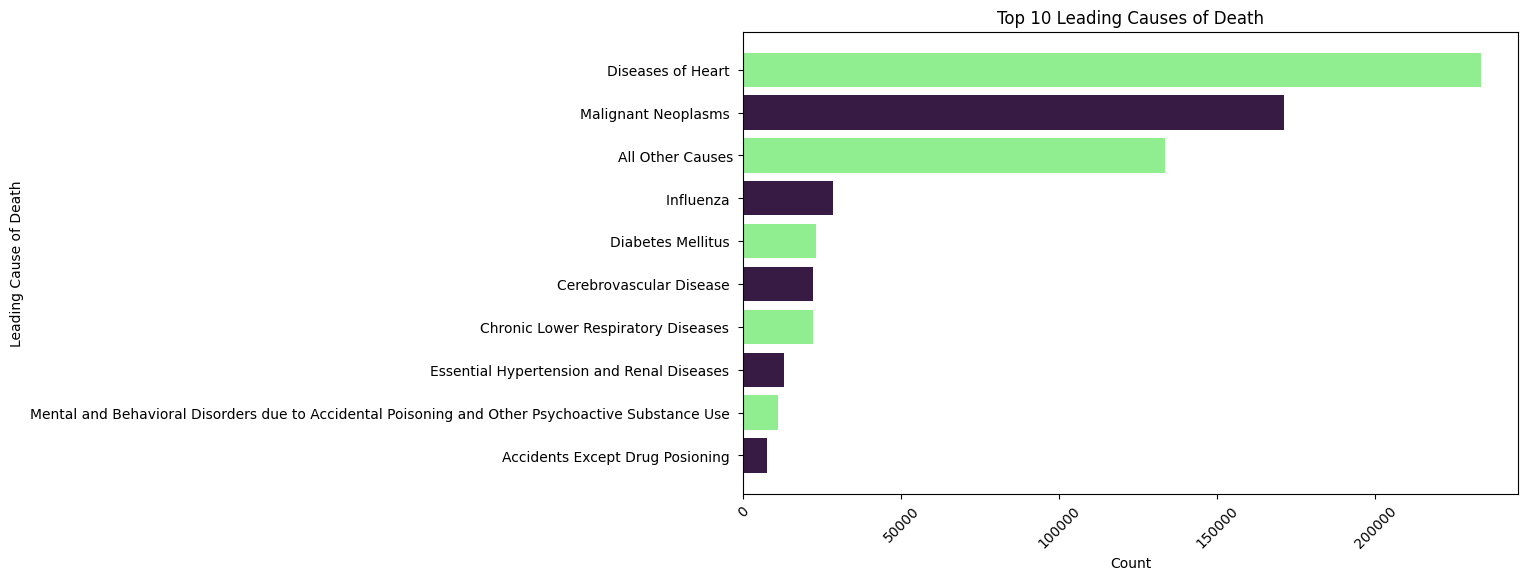

In [13]:
# The following creates a horizontal bar chart using Matplotlib to visualize the top 10 causes of death. 
data = df_cleaned.groupby("Leading Cause")['Deaths'].sum().nlargest(10)[::-1]
data = pd.DataFrame(data).reset_index()

plt.figure(figsize=(10, 6))
plt.barh(data['Leading Cause'], data['Deaths'], color=['#381b45', 'lightgreen'])
plt.xticks(rotation=45)
plt.title('Top 10 Leading Causes of Death')
plt.xlabel('Count')
plt.ylabel('Leading Cause of Death')
plt.show()

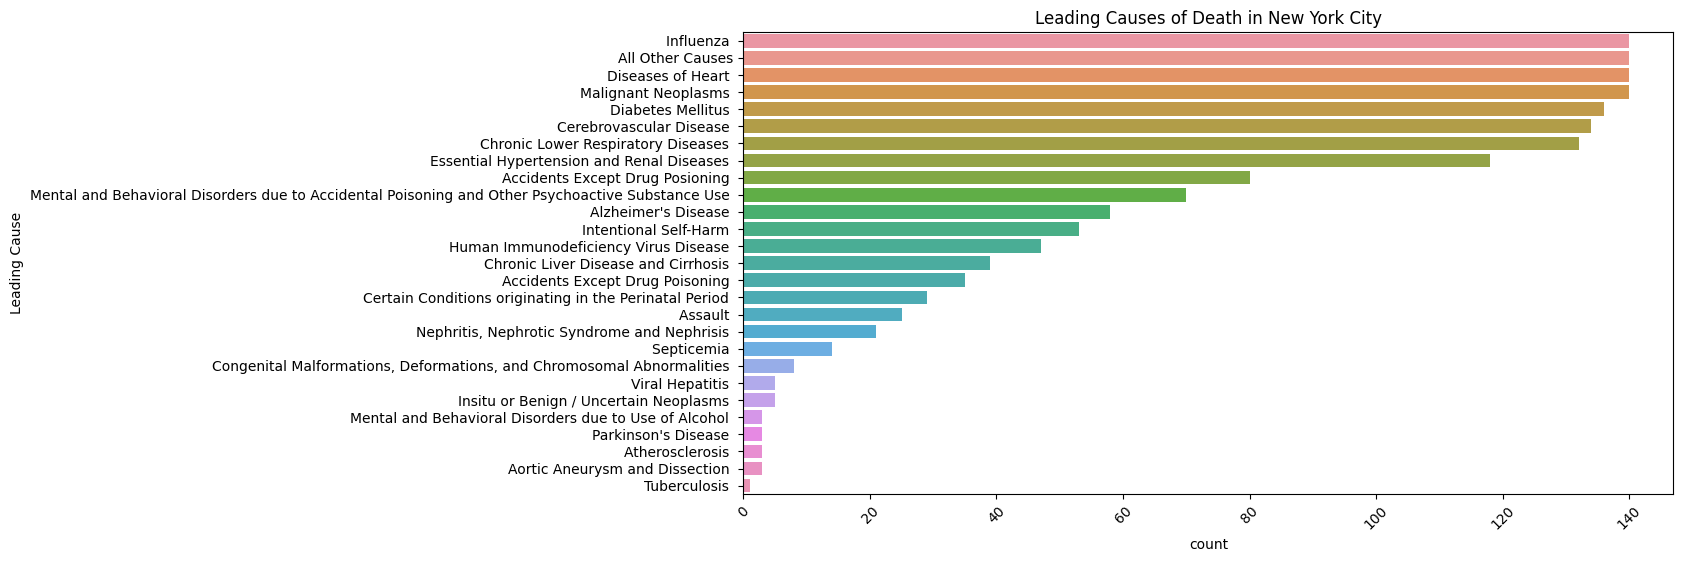

In [14]:
# Visualzation
# Plotting a bar chart of leading causes of death
plt.figure(figsize=(12, 6))
sns.countplot(y='Leading Cause', data=df_cleaned, order=df_cleaned['Leading Cause'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Leading Causes of Death in New York City')
plt.show()

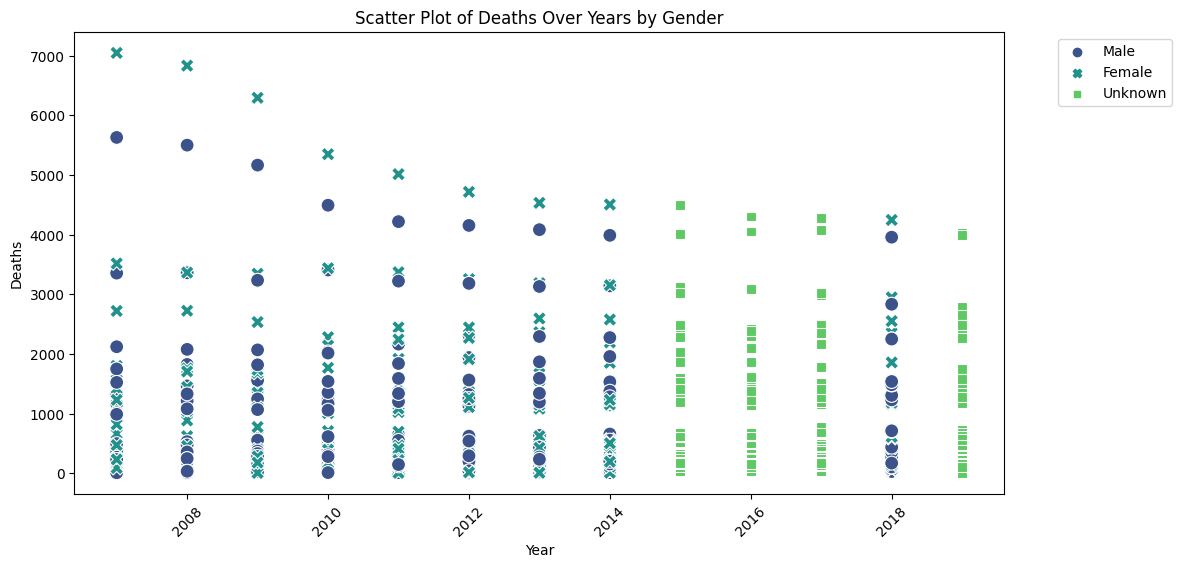

In [15]:
# The following Scatter plot displays the deaths over the different years
plt.figure(figsize=(12, 6))

# Scatter plot with different marker and colors
sns.scatterplot(x='Year', y='Deaths', hue='Sex_Descr', style='Sex_Descr', data=df_cleaned, s=100, palette='viridis')

# Title and labels
plt.title('Scatter Plot of Deaths Over Years by Gender')
plt.xlabel('Year')
plt.ylabel('Deaths')

# Legend properties
plt.legend(title='Sex', loc='upper left', fontsize='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotations
plt.annotate('Interesting point', xy=(pd.to_datetime('2022-01-01'), 80000), xytext=(pd.to_datetime('2010-01-01'), 120000),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Axis labels size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# rotate the x-axis labels
plt.xticks(rotation=45)
plt.show()

In [16]:
# Group by ethnicity and calculate the percentage of deaths
ethnicity_deaths = df_cleaned.groupby('Race Ethnicity')['Deaths'].sum()
total_deaths = ethnicity_deaths.sum()
percentage_deaths = (ethnicity_deaths / total_deaths) * 100

percentage_deaths

Race Ethnicity
Asian and Pacific Islander     6.989503
Black Non-Hispanic            16.025868
Hispanic                      18.502381
Non-Hispanic Black            10.422093
Non-Hispanic White            17.082183
Not Stated/Unknown             0.888579
Other Race/ Ethnicity          0.308500
White Non-Hispanic            29.780891
Name: Deaths, dtype: float64

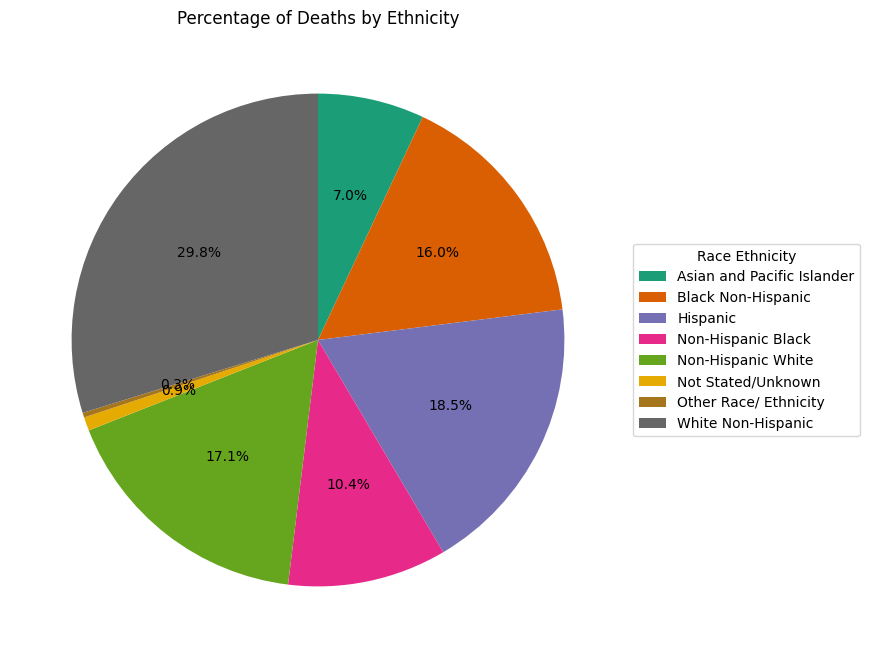

In [17]:
# Create a pie chart of percent deaths by ethnicity
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(percentage_deaths, autopct='%1.1f%%', startangle=90, counterclock=False, colors=plt.cm.Dark2.colors)


plt.title('Percentage of Deaths by Ethnicity') # Pie Chart Title
# Add a legend
plt.legend(wedges, percentage_deaths.index, title='Race Ethnicity', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.show() # displays the pie chart

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.




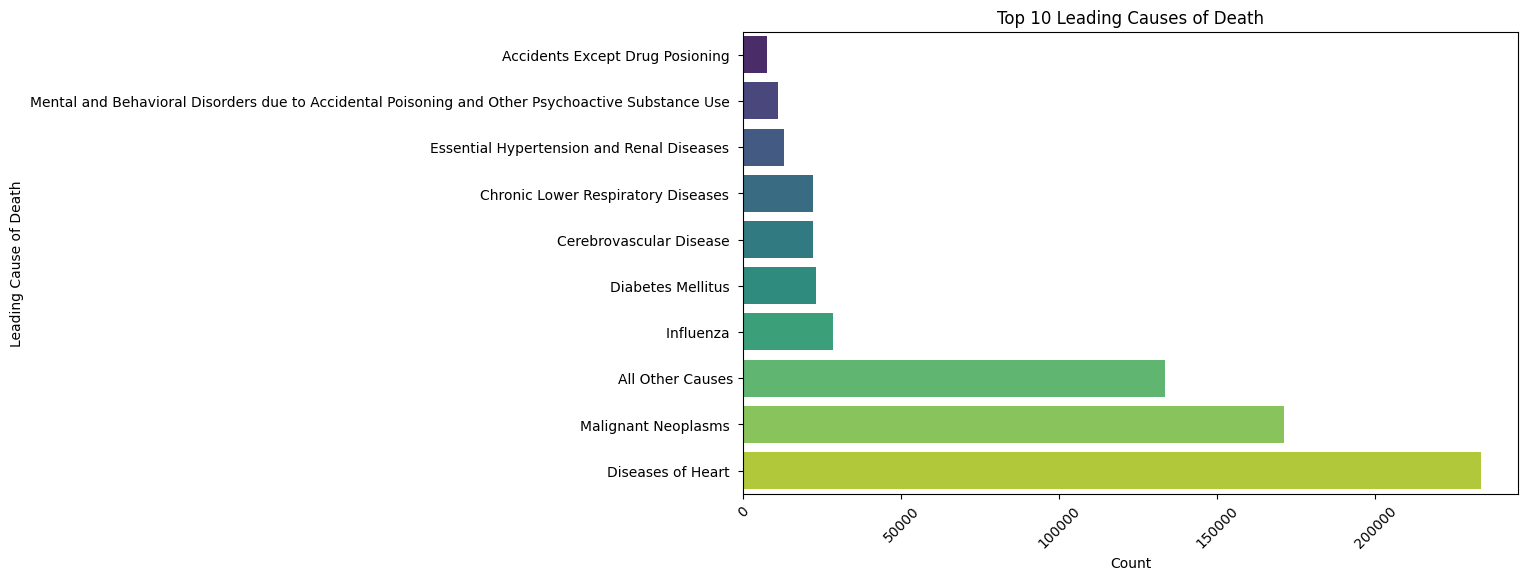

In [18]:
# Use the Seaborn library to a horizontal bar chart
# Group by leading cause and calculate the total deaths, select top 10 causes
data = df_cleaned.groupby("Leading Cause")['Deaths'].sum().nlargest(10)[::-1]
data = pd.DataFrame(data).reset_index()

# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Deaths', y='Leading Cause', data=data, palette='viridis')

# Set plot properties
plt.title('Top 10 Leading Causes of Death')
plt.xlabel('Count')
plt.ylabel('Leading Cause of Death')

# Rotate x-axis labels for better visibility
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)

plt.show()

#### Explanation
Plot Representation: The above horizontal bar chart visualizes the top 10 leading causes of death, with each bar representing the total count of deaths associated with a specific cause.

#### Properties  showcased in the plot:
1. Color Palette (palette='viridis'): Seaborn's color palette is used to enhance the visual appeal of the bars. The 'viridis' colormap is chosen for its perceptually uniform colors.

2. Title (plt.title('Top 10 Leading Causes of Death')): Clearly indicates the purpose of the chart.

3. X and Y Labels (plt.xlabel('Count') and plt.ylabel('Leading Cause of Death')): Provide context for the axes.

4. X-axis Label Rotation (bar_plot.set_xticklabels(..., rotation=45)): Rotates x-axis labels for better readability, especially when the labels are long.


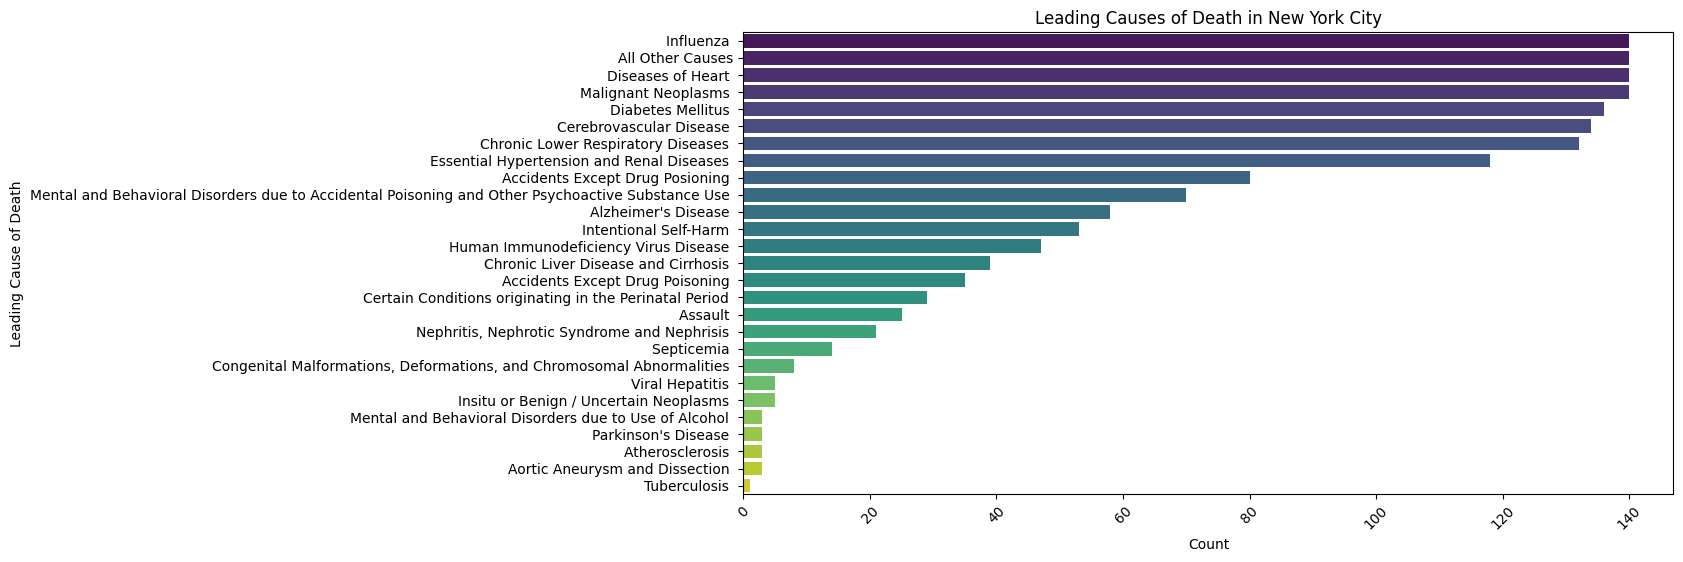

In [19]:
# Plotting a bar chart of leading causes of death using Seaborn
plt.figure(figsize=(12, 6))
bar_plot = sns.countplot(y='Leading Cause', data=df_cleaned, order=df_cleaned['Leading Cause'].value_counts().index, palette='viridis')

# Set plot properties
plt.title('Leading Causes of Death in New York City')
plt.xlabel('Count')
plt.ylabel('Leading Cause of Death')

# Rotate y-axis labels for better visibility
bar_plot.set_yticklabels(bar_plot.get_yticklabels())
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)

plt.show()


#### Explanation:
Plot Representation: The above bar chart visualizes the frequency of each leading cause of death in New York City. Each bar represents the count of occurrences for a specific cause.

#### Properties showcased in the plot:
1. Color Palette (palette='viridis'): Seaborn's color palette is used to enhance the visual appeal of the bars. The 'viridis' colormap is chosen for its perceptually uniform colors.

2. Title (plt.title('Leading Causes of Death in New York City')): Clearly indicates the purpose of the chart.

3. X and Y Labels (plt.xlabel('Count') and plt.ylabel('Leading Cause of Death')): Provide context for the axes.

4. Y-axis Label Rotation (bar_plot.set_yticklabels(..., rotation=45)): Rotates y-axis labels for better readability, especially when the labels are long.


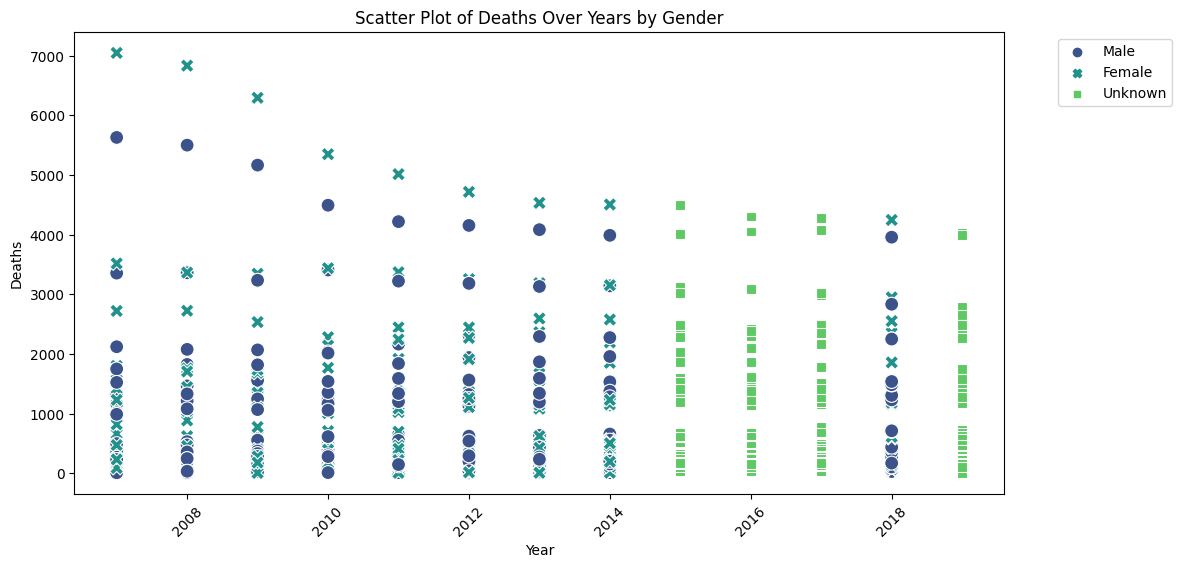

In [20]:
# Scatter plot of deaths over different years by gender using Seaborn
plt.figure(figsize=(12, 6))

# Scatter plot with different marker and colors
scatter_plot = sns.scatterplot(x='Year', y='Deaths', hue='Sex_Descr', style='Sex_Descr', data=df_cleaned, s=100, palette='viridis')

# Title and labels
plt.title('Scatter Plot of Deaths Over Years by Gender')
plt.xlabel('Year')
plt.ylabel('Deaths')

# Legend properties
plt.legend(title='Sex', loc='upper left', fontsize='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotations
plt.annotate('Interesting point', xy=(pd.to_datetime('2022-01-01'), 80000), xytext=(pd.to_datetime('2010-01-01'), 120000),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Axis labels size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Rotate the x-axis labels for better readability
scatter_plot.set_xticklabels(scatter_plot.get_xticklabels(), rotation=45)

plt.show()


#### Explanation:
Plot Representation: The scatter plot above visualizes the relationship between deaths and years, differentiated by gender. Each point represents a specific year and the corresponding number of deaths, with different markers and colors for each gender.

#### Properties  showcased in the Scatter  plot
1. Marker and Colors (sns.scatterplot(...) with style='Sex_Descr', palette='viridis'): Differentiates data points by gender using distinct markers and colors.

2. Title (plt.title('Scatter Plot of Deaths Over Years by Gender')): Clearly indicates the purpose of the chart.

3. X and Y Labels (plt.xlabel('Year') and plt.ylabel('Deaths')): Provide context for the axes.

4. Legend (plt.legend(...) with title, location, and fontsize): Displays a legend for differentiating between genders.

5. Annotations (plt.annotate(...)): Adds a text annotation at a specific point on the plot.

6. Axis Labels Size (plt.xticks(fontsize=10) and plt.yticks(fontsize=10)): Adjusts the size of axis labels for better readability.

7. Rotate x-axis labels (scatter_plot.set_xticklabels(..., rotation=45)): Rotates x-axis labels for better readability, especially when the labels are years.


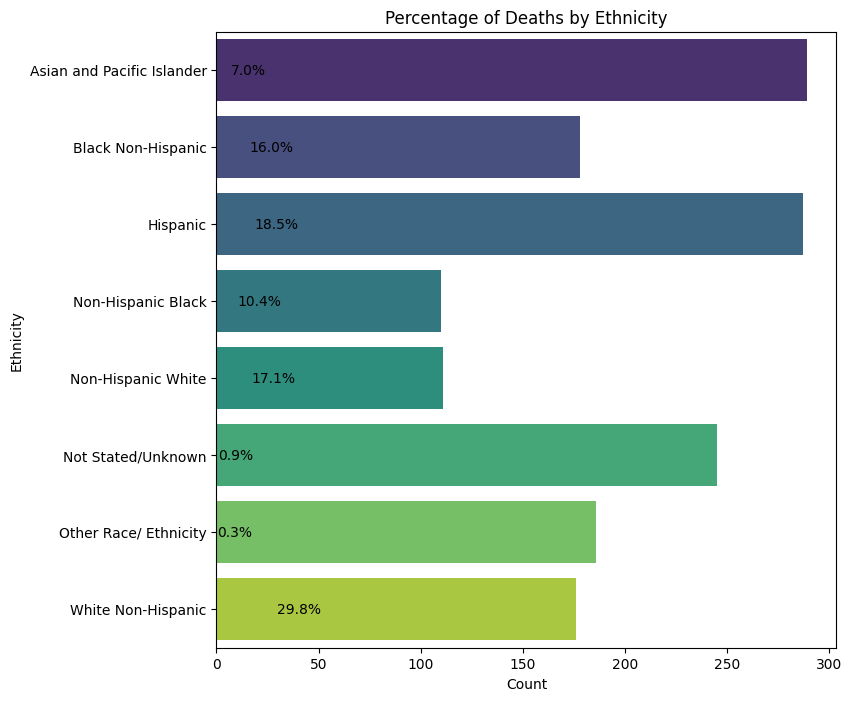

In [21]:
# Creating a pie chart using Seaborn is a bit different from the traditional pie chart approach. 
# Seaborn doesn't have a direct function for pie charts, insteaad I used the countplot function to create a 
# countplot to represent the count of deaths by ethnicity, and then we annotate the plot with the percentage values. 

# Create a countplot with Seaborn to represent percentage deaths by ethnicity
plt.figure(figsize=(8, 8))
countplot = sns.countplot(y='Race Ethnicity', data=df_cleaned, order=percentage_deaths.index, palette='viridis')

# Annotate the plot with percentage values
for index, value in enumerate(percentage_deaths):
    countplot.text(value, index, f'{value:.1f}%', ha='left', va='center', fontsize=10)

# Set plot properties
plt.title('Percentage of Deaths by Ethnicity')
plt.xlabel('Count')
plt.ylabel('Ethnicity')

plt.show()


#### Explanation:
Plot Representation: The pie chart visualizes the distribution of deaths among different ethnicities, representing the percentage of deaths for each ethnicity.

#### Properties showcased in the Pie Chart
1. Color Palette (colors=sns.color_palette("Dark2")): Uses Seaborn's color palette for a visually appealing set of colors.

2. Title (plt.title('Percentage of Deaths by Ethnicity')): Clearly indicates the purpose of the chart.

3. Labels (labels=percentage_deaths.index): Specifies labels for each section of the pie chart.

4. Legend (plt.legend(...)): Adds a legend to provide information about the corresponding ethnicities.

### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



Seaborn is built on top of Matplotlib and provides a higher-level interface for creating statistical visualizations with less boilerplate code. Matplotlib, on the other hand, offers more flexibility and control for custom plots and is a foundational library for data visualization in Python. The choice between them depends on the specific requirements and preferences for a given visualization task.

Creating plots in Matplotlib and Seaborn involves some differences in syntax and style. Some of the key differences when crearting plots in Matplotlib based on the above plots previously created are :

1. Color Palette:- Matplotlib usually requires specifying colors explicitly using parameters like color in functions. Colormaps are commonly used, but it may involve additional steps.

2. Styling:- Styling elements like markers, line styles, and colors may require individual specifications, and customization can be more verbose.

3. Plot Types:- Matplotlib offers a wide range of plot types and customization options but may require more code for certain complex plots.

4. Data Handling:- Matplotlib requires manual manipulation of data for certain plot types, such as aggregating data before plotting.

5. Legend Handling:- Legend properties and placement may need to be explicitly set, and customization can be more manual.

6. Annotation in Matplotlib, such as text or arrows, may require additional functions and parameters for customization.

7. Readability and Modernization:- While powerful, creating modern and visually appealing plots in Matplotlib may require more effort and customization.

Some of the key differences when crearting plots in Seaborn based on the above plots previously created are :

1. Color Palette: Seaborn simplifies color handling by providing built-in color palettes. It allows for easily choosing color schemes with functions like palette in various plotting functions.

2. Styling:- Seaborn simplifies styling with built-in themes and color palettes. It automatically enhances the aesthetics of plots with less effort.

3. Plot Types:- Seaborn specializes in statistical data visualization with functions optimized for common plot types. It provides a high-level interface for creating aesthetically pleasing plots with minimal code.

4. Data Handling:- Seaborn often works directly with Pandas DataFrames and Series, making it more convenient for statistical data analysis.

5. Legend Handling:- Seaborn provides convenient options for handling legends with built-in functions like plt.legend().

6. Annotation:- Seaborn offers similar annotation features, but the syntax might be more straightforward for certain types of annotations.

7. Readability and Modernization:- Seaborn was designed to create attractive and informative statistical graphics with less code, making it more suitable for quick, aesthetically pleasing visualizations.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

The dataset contains information on the leading causes of death in New York City. Exploring the data reveals the most prevalent health issues impacting the population. Diseases of the Heart and Influenza are the leading cause of death in New York.

Demographic Analysis of information such as age, gender, and ethnicity, allows for a comprehensive analysis of how different groups are affected by various causes of death.

Analyzing deaths by ethnicity allows for the identification of potential health disparities among different racial and ethnic groups. This information is crucial for developing targeted healthcare strategies. It is evident White Non-Hispanic had the highest deaths with a percentage of 29.8.

